In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [10]:
'''READ IN SOURCE FILE (Forwards)'''
if __name__ == '__main__':
    '''INCLUDE TEXT FILE'''
    Data = np.genfromtxt("Eu-152_2.txt", comments="#", delimiter=",", filling_values='0')
    ExpData = np.genfromtxt("setup_info.txt", comments="#", delimiter=",", filling_values='0')
    Efficiencies = np.genfromtxt("efficiency.txt", comments="#", delimiter=",", filling_values='0')

    # Order of matrix (number of energy levels, including the ground state)
    w = len(Data[0])
    '''Defining energy drops (keV)
    This section reads in energy levels and converts them to a matrix containing the energies of gamma rays emitted from all possible energy drops.
    ''' 
    # Creates empty matrix of appropriate dimensions, and reads in data from first line of text file
    Energies = np.zeros((w,w))
    length_end = w+1
    # print(length_end)
    for i in range(0,w):
    # creates empty vector
        v=0
        for j in range(0,len(Data[0])):
    #         Defines energy drops
            k = Data[0,i]-Data[0,j]
            j=j+1
            v=np.append(v,k)
    #     Ensures that matrix only contains one copy of each value
        for d in range(0,len(v)):
            if v[d] < 0:
                v[d]=0
    #     Adds each vector to empty matrix
        Energies[i]=np.array(v[1:length_end])
    # Final energy levels (keV)

    '''Feeding Fractions'''
    # Create vector from file
    F = np.array([Data[1]])

    '''Branching Fractions'''
    # Create matrix from file
    x = np.array(Data[2:2+w])  
    
    '''Conversion Coefficients'''
    astart = 2+w
    aend = astart + w
    # if debug=True, print astart and aend ("alpha caps")
    alpha = np.array(Data[astart:aend])
    ###alpha = np.ones((4,4))*0 #no conversion coefficients for toy system
    
    '''Total Efficiency'''
#     Tline = 2+w
#     # If debug=True, print Tline
#     T = Data[Tline]
#     et = T.sum() #for total array
    et = ExpData[0]
    
    '''Peak Efficiencies'''
    # Round energy levels to nearest integer
    ep = np.rint(Energies)
    # print(P)
    for i in range(0,len(ep[0])):
        for j in range(0,len(ep[0])):
            if np.not_equal(ep[i,j],0)==True:
                d=ep[i,j]
    #             Change D type to integer and value to reflect line number in TRIUMF data 
                D=d.astype(int)-9
    #             Change array value to peak efficiency for specified energy
                ep[i,j] = Efficiencies[D,1]

    '''Source disintegration rate'''
#     rline = aend
#     r = np.array(Data[rline])
#     R = r.sum()
    R = ExpData[1]

    '''Number of detectors'''
#     nline = rline + 1
#     q = (Data[nline])
    Q = ExpData[2]

In [11]:
'''Function to determine full count ratios WITH summing (S)'''
def FullSum(x, F, Energies, et, ep, Q, alpha, debug, show):        
    
    '''Normalizing X and F'''
    # Normalize branching ratios
    for i in range(0,len(x)):
        xsum = x[i].sum()
        if np.equal(xsum,0)==True:
            for j in range(0,len(x)):
                x[i,j] = x[i,j]
                j=j+1
        else:
            if np.not_equal(xsum,1)==True:
                for j in range(0,len(x)):
                    x[i,j] = x[i,j]/float(xsum)   #float(xsum)
                    j=j+1
        i=i+1  
    
    # Normalize feeding fractions
    fsum=F.sum()
    # print(fsum)
    if F.sum()>1:
        for i in range(0,len(F)):
            F[i] = F[i]/float(fsum)
            
    '''Probabilities'''
        # probability of branch decay occuring (accounting for loss through conversion)
    c = x/(1+alpha) 
        # probability of peak detected at expected photopeak (decay * peak efficiency)
    a = c*ep/Q
        # probability of peak detected anywhere in spectrum (decay * total efficiency)
    e = c*et/Q
        # probability of no gamma ray detection (used for summing out)
    b = x-e

    E = np.identity(w)
    
    '''FULL SUMMING'''
    '''These while loops currently compare float values to zero without a defined tolerance for equality.
    I can set the absolute tolerance using np.isclose() or math.isclose(), but I need to decide on a threshold value.'''

        # summing in 
    aa = a.dot(a)
#     asum = aa.sum
    asum = aa.sum(dtype=float)
    while (asum > 0):
        a = a + aa
        aa = np.dot(aa,a)
        asum = aa.sum(dtype=float)
    A = Q*a

        # summing out
    bb = b.dot(b)
    bsum = bb.sum(dtype=float)
    while (bsum > 0):
        b = b + bb
        bb = np.dot(bb,b)
        bsum = bb.sum(dtype=int)
    B = (E + b) #kth power

    '''Calculating full measured peaks (S)'''

    # EQUATION 6

    n = F.dot(B)
    N = E*n


    m = B[0:w,0]
    M = E*m
    
    S = R*N.dot(A).dot(M)
    
#     if write==True:
#         Xmat=np.matrix(x)
#         with open('Testing123.txt') as FILE:
#             for line in Xmat:
#                 np.savetxt(FILE, line, fmt='%10.5f')
#         FILE.write("Feeding fractions:",'\n',F)
#         FILE.write("Summed peaks", '\n', S)
    
    if debug==True:
        print("Energy levels:",'\n',Energies)
        print("Total efficiency:",'\n',et)
        print('Tline', Tline)
        print("Peak efficiencies:",'\n',ep) 
        print("Conversion coefficients:",'\n',alpha)
        print("alpha caps", astart, aend)
        print("Source disintegration rate:", '\n', R)
        print("Number of detectors:", '\n', Q)
        print("A", '\n', A)
        print("B", '\n', B)
    
    if show==True:
        print("Branching fractions:",'\n',x)
        print("Feeding fractions:",'\n',F)
        print("Summed peaks", '\n', S)
    
    return(S)

S=FullSum(x, F, Energies, et, ep, Q, alpha, debug=False, show=True)

Branching fractions: 
 [[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.0000000

In [12]:
'''Function to determine count ratios WITHOUT summing (So)'''
def NoSum(x, F, Energies, et, ep, Q, alpha, debug, show):        
    
    '''Normalizing X and F'''
    # Normalize branching ratios
    for i in range(0,len(x)):
        xsum = x[i].sum()
        if np.equal(xsum,0)==True:
            for j in range(0,len(x)):
                x[i,j] = x[i,j]
                j=j+1
        else:
            if np.not_equal(xsum,1)==True:
                for j in range(0,len(x)):
                    x[i,j] = x[i,j]/float(xsum)   #float(xsum)
                    j=j+1
        i=i+1  
    
    # Normalize feeding fractions
    fsum=F.sum()
    # print(fsum)
    if F.sum()>1:
        for i in range(0,len(F)):
            F[i] = F[i]/float(fsum)
            
    '''Probabilities'''
        # probability of branch decay occuring (accounting for loss through conversion)
    c = x/(1+alpha) 
        # probability of peak detected at expected photopeak (decay * peak efficiency)
    a = c*ep/Q
        # probability of peak detected anywhere in spectrum (decay * total efficiency)
    e = c*et/Q
        # probability of no gamma ray detection (used for summing out)
    b = x-e

    E = np.identity(w)

    '''FULL SUMMING'''
    '''These while loops currently compare float values to zero without a defined tolerance for equality.
    I can set the absolute tolerance using np.isclose() or math.isclose(), but I need to decide on a threshold value.'''

#         # summing in 
#     aa = a.dot(a)
#     asum = aa.sum
#     asum = aa.sum(dtype=float)
#     while (asum > 0):
#         a = a + aa
#         aa = np.dot(aa,a)
#         asum = aa.sum(dtype=float)
#     A = a

#         # summing out
#     bb = b.dot(b)
#     bsum = bb.sum(dtype=float)
#     while (bsum > 0):
#         b = b + bb
#         bb = np.dot(bb,b)
#         bsum = bb.sum(dtype=int)
#     B = E + b #kth power
    
    '''NO SUMMING'''
    Ao = a
    xo = x
    xx = x.dot(x)
    xsum = xx.sum(dtype=float)
    while (xsum > 0):
        xo = xo + xx
        xx = np.dot(xx,xo)
        xsum = xx.sum(dtype=float)
    xprime = Q*xo
    
    Bo = E+xprime

    no = F.dot(Bo)
    No = E*no

    mo = Bo[0:w,0]
    Mo = E

    So = R*No.dot(Ao).dot(Mo)
    
    if debug==True:
        print("Energy levels:",'\n',Energies)
        print("Total efficiency:",'\n',et)
        print('Tline', Tline)
        print("Peak efficiencies:",'\n',ep) 
        print("Conversion coefficients:",'\n',alpha)
        print("alpha caps", astart, aend)
        print("Source disintegration rate:", '\n', R)
        print("Number of detectors:", '\n', Q)
        print("Ao", '\n', Ao)
        print("Bo",'\n', Bo)
        print("(F . B_o)", '\n', no)
        print("No",'\n', No)
        print("Mo",'\n', Mo)
    
    if show==True:
        print("Branching fractions:",'\n',x)
        print("Feeding fractions:",'\n',F)
        print("Peaks without summing:",'\n',So)
    
    return(So)

So=NoSum(x, F, Energies, et, ep, Q, alpha, debug=False, show=False)

In [13]:
'''Heatmap of Ratio'''
def Ratioheatmap(Sfull, So, keV, debug, show):
    Elabels=keV.astype(str)
    w=len(keV)
    SR=np.zeros((w,w))
    for i in range(0,w):
        for j in range(0,w):
            if np.not_equal(So[j,i],0)==True:
                SR[j,i]=Sfull[j,i]/So[j,i]
            
    MaxSR = np.amax(SR)

    fig, ax = plt.subplots()
    plt.subplots_adjust(bottom=0, right=2, top=2)
    
    heatmap2=plt.imshow(SR, cmap='inferno', vmin=0, vmax=1, interpolation='none')
    cbar2=plt.colorbar(heatmap2)
    cbar2.ax.set_yticklabels(['0','.2','.4','.6','.8','>1'])
    cbar2.set_label('Ratio of Counts',fontsize=14,rotation=270)

    # put the major ticks at the middle of each cell
    plt.title('Ratio of Full Counts (S/So)', fontsize=20)
    ax.set_xlabel('Final Energy level (keV)', fontsize=14)
    ax.set_ylabel('Initial Energy Level (keV)', fontsize=14)
    ax.set_xticks(np.arange(SR.shape[1]), minor=False)
    ax.set_yticks(np.arange(SR.shape[0]), minor=False)
    # ax.invert_yaxis()

    ax.set_xticklabels(Elabels, minor=False, rotation=45)
    ax.set_yticklabels(Elabels, minor=False)
    
    # ax.set_yticklabels(Elabels[1:])
    
    if debug==True:
        print('MAX Ratio','\n', MaxSR)
        
    if show==True:
        print("Energy States:",'\n', keV)
        print('Correction Factor', '\n', SR)
        
    return(heatmap2)

In [14]:
'''Heatmap of Difference due to Summing'''
def Differenceheatmap(Sfull, So, keV, debug, show):
    Elabels=keV.astype(str)
    
    SDiff=(Sfull-So)
    SPercent=np.zeros((w,w))
    for i in range(0,w):
        for j in range(0,w):
            if np.not_equal(So[j,i],0)==True:
                SPercent[j,i]=(Sfull[j,i]-So[j,i])/So[j,i]
    
    MaxDiff = np.amax(SDiff)

    fig, ax = plt.subplots()
    plt.subplots_adjust(bottom=0, right=2, top=2)
    
    heatmap1=plt.imshow(SDiff, cmap='seismic', vmin=-30, vmax=30, interpolation='none', aspect='auto')
    
    cbar1=plt.colorbar(heatmap1)
    cbar1.ax.set_yticklabels(['<-30','-20','-10','0','10','20','>30'])
    cbar1.set_label('Relative Difference in Counts', fontsize=18, rotation=270)

    # put the major ticks at the middle of each cell
#     plt.title('Difference in Counts due to Summing (S-So)', fontsize=28)
    ax.set_xlabel('Final Energy level (keV)', fontsize=18)
    ax.set_ylabel('Initial Energy Level (keV)', fontsize=18)
    ax.set_xticks(np.arange(SDiff.shape[1]), minor=False)
    ax.set_yticks(np.arange(SDiff.shape[0]), minor=False)
    # ax.invert_yaxis()

    ax.set_xticklabels(Elabels, minor=False, rotation=45, fontsize=14)
    ax.set_yticklabels(Elabels, minor=False, fontsize=14)
    
    # ax.set_yticklabels(Elabels[1:])
    
    if debug==True:
        print('MAX Full-No Sum','\n',MaxDiff)
        
    if show==True:
        print("Energy States:",'\n', keV)
        print('Full-No Sum', '\n', SDiff)
        
    return(heatmap1)

MAX Full-No Sum 
 1838.72821309


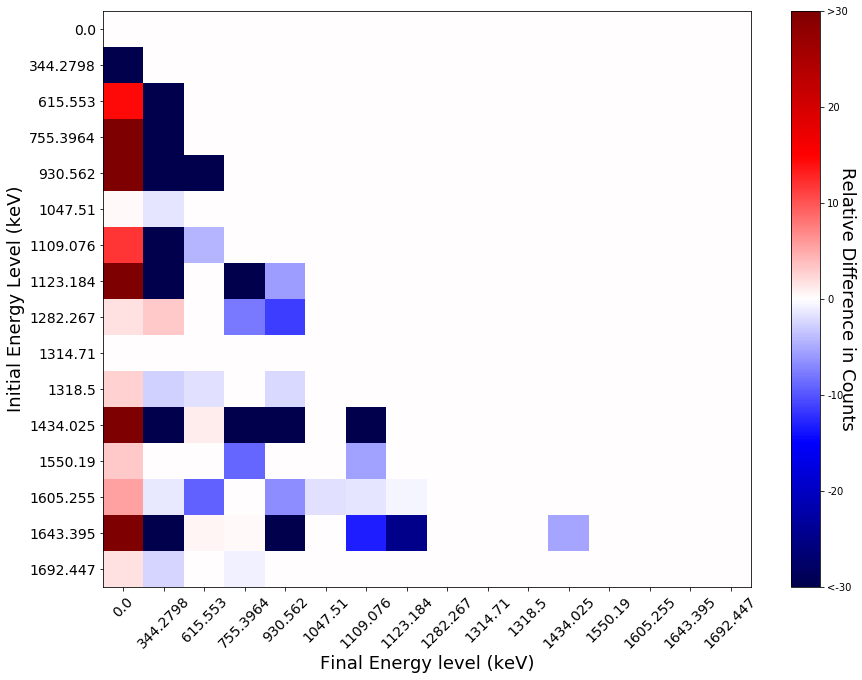

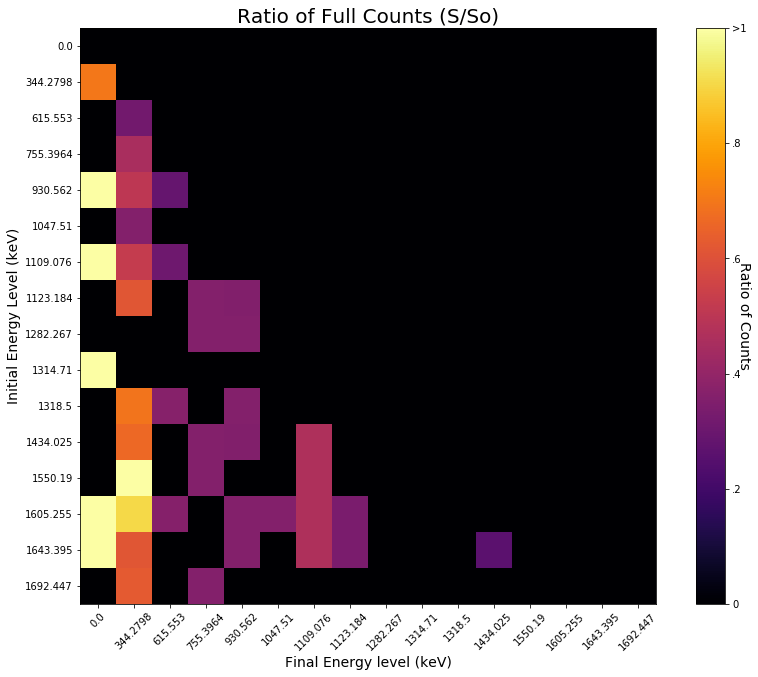

In [15]:
# TCSFheatmap(S, So, Data[0], debug=False, show=True)
Difference=Differenceheatmap(S, So, Data[0], debug=True, show=False);
Ratio1=Ratioheatmap(S, So, Data[0], debug=False, show=False);

In [27]:
'''READ IN PEAK FILES'''
'''Inputs: Measured peaks (S), peak efficiencies (ep), total efficiency (et)'''
PeakData = np.genfromtxt("Co-60_PEAKS_2", comments="#", delimiter=",", filling_values='0')
ExpData = np.genfromtxt("setup_info.txt", comments="#", delimiter=",", filling_values='0')
Efficiencies = np.genfromtxt("efficiency.txt", comments="#", delimiter=",", filling_values='0')

def PeaktoSource(PeakData, ExpData, Efficiencies, debug, show):
    # Order of matrices (number of energy levels, including the ground state)
    w = len(PeakData[0])

    '''PROVIDED VALUES'''
    
    '''Total Efficiency'''
#     Tline = rline+1
#     # print('Tline', Tline)
#     T = PeakData[Tline]
#     et = T.sum() #for total array
    et = ExpData[0]

    '''Source disintegration rate'''
#     rline = 0
#     r = np.array(PeakData[rline])
#     R = r.sum()
    R = ExpData[1]

    
    '''Number of detectors'''
#     nline = aend
#     q = (PeakData[nline])
#     Q = q.sum()
    Q = ExpData[2]

    '''Energy Levels (keV)'''
    # Creates empty matrix of appropriate dimensions, and reads in data from line of text file
    Energies = np.zeros((w,w))
    length_end = w+1
#     eline = nline+1
    # print(length_end)
    for i in range(0,w):
    # creates empty vector
        v=0
        for j in range(0,w):
    #         Defines energy drops
            k = PeakData[0,i]-PeakData[0,j]
            j=j+1
            v=np.append(v,k)
    #     Ensures that matrix only contains one copy of each value
        for d in range(0,len(v)):
            if v[d] < 0:
                v[d]=0
    #     Adds each vector to empty matrix
        Energies[i]=np.array(v[1:length_end])
    # Final energy levels (keV)

    '''Measured Peaks'''
    MPstart = 1
    MPend = 1 + w
    # print("MPcaps", MPstart, MPend)
    S = np.array(PeakData[MPstart:MPend])
    
    '''Conversion Coefficients'''
    astart = 1 + w
    aend = astart + w
#     print("Acaps", astart, aend)
    alpha = np.array(PeakData[astart:aend])
    ###alpha = np.ones((4,4))*0 #no conversion coefficients for toy system

    '''Peak Efficiencies'''
    # Round energy levels to nearest integer
    ep = np.rint(Energies)
    # print(P)
    for i in range(0,len(ep[0])):
        for j in range(0,len(ep[0])):
            if np.not_equal(ep[i,j],0)==True:
                d=ep[i,j]
    #             Change D type to integer and value to reflect line number in TRIUMF data 
                D=d.astype(int)-9
    #             Change array value to peak efficiency for specified energy
                ep[i,j] = Efficiencies[D,1]
    
    if debug==True:
        print('Number of Detectors', '\n', Q)
        print("Conversion coefficients:",'\n',alpha)
        print("Source disintegration rate:", '\n', R)
        print("Total efficiency:",'\n',et)
    
    if show==True:
        print("Energy levels:",'\n', Energies)
        print("Peak efficiencies:",'\n',ep)
        print("Measured Peaks:",'\n',S)        
    
    return(S)

OSError: Co-60_PEAKS_2 not found.

In [28]:
Sm=PeaktoSource(PeakData, ExpData, Efficiencies, debug=False, show=True)
filediff=S-Sm
totaldiff=np.amax(filediff)
'''Check agreement between full counts to machine precision'''
print("%.6f" % totaldiff)

Energy levels: 
 [[    0.         0.         0.         0.         0.         0.         0.
      0.         0.         0.         0.         0.         0.         0.
      0.         0.    ]
 [  344.2798     0.         0.         0.         0.         0.         0.
      0.         0.         0.         0.         0.         0.         0.
      0.         0.    ]
 [  615.553    271.2732     0.         0.         0.         0.         0.
      0.         0.         0.         0.         0.         0.         0.
      0.         0.    ]
 [  755.3964   411.1166   139.8434     0.         0.         0.         0.
      0.         0.         0.         0.         0.         0.         0.
      0.         0.    ]
 [  930.562    586.2822   315.009    175.1656     0.         0.         0.
      0.         0.         0.         0.         0.         0.         0.
      0.         0.    ]
 [ 1047.51     703.2302   431.957    292.1136   116.948      0.         0.
      0.         0.         0.   

In [52]:
'''Guess branching ratios (Xg)'''
def findX(w, S, ep, bebug, show):
    Xguess = np.zeros((w,w))
    for j in range(len(ep[0])):
        for i in range(0,len(ep[0])):
            if np.not_equal(S[j,i],0)==True:
                Xguess[j,i]=S[j,i]/ep[j,i]
            elif np.equal(S[j,i],0)==True:
                Xguess[j,i]=0
                
#     Normalize
    for j in range(0,len(Xguess[0])):
        Xgsum = Xguess[j].sum()
        for i in range(0,len(Xguess[0])):
            if np.not_equal(Xgsum,0)==True:
                    Xguess[j,i] = Xguess[j,i]/Xgsum
            elif np.not_equal(Xgsum,0)==False:
                    Xguess[j,i] = Xguess[j,i]
                    
    if bebug==True:
        print("Peaks",'\n', S)
        print("peak efficiencies",'\n', ep)
        
    if show==True:
        print("First branching ratio guess:",'\n', Xguess)
    
    return(Xguess)

'''Guess feeding fractions (Fg)'''
def findF(Xg, bebug, show):
    Fguess = np.zeros(w)
    for i in range(len(Xg[0])):
        for j in range(0,len(Xg[0])):
            fg = sum(Xg[i,0:len(Xg[0])])-sum(Xg[0:len(Xg[0]),i])
        Fguess[i]=fg
        for d in range(0,len(Fguess)):
            if Fguess[d] < 0:
                Fguess[d]=0
    
# Normalize:
    for j in range(len(Xg[0])):
        Fgsum=Fguess.sum()
        if np.not_equal(Fgsum,0)==True:
                Fguess[j] = Fguess[j]/Fgsum
        elif np.not_equal(Fgsum,0)==False:
                Fguess[j] = Fguess[j]
    
    if bebug==True:
        print("Branching ratio guess:",'\n', Xg)
        
    if show==True:
        print("Feeding ratio guess:",'\n', Fguess)
        
    return(Fguess)
print(x[2,:])
print(F[0])

[ 0.13636364  0.86363636  0.          0.        ]
[  0.00000000e+00   1.19997600e-03   1.99996000e-05   9.98780024e-01]


Final Difference 
 [[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
Feeding Fraction Difference 
 [[  8.06708579e-02   5.90960821e-01  -1.99996000e-05  -6.71611679e-01]]


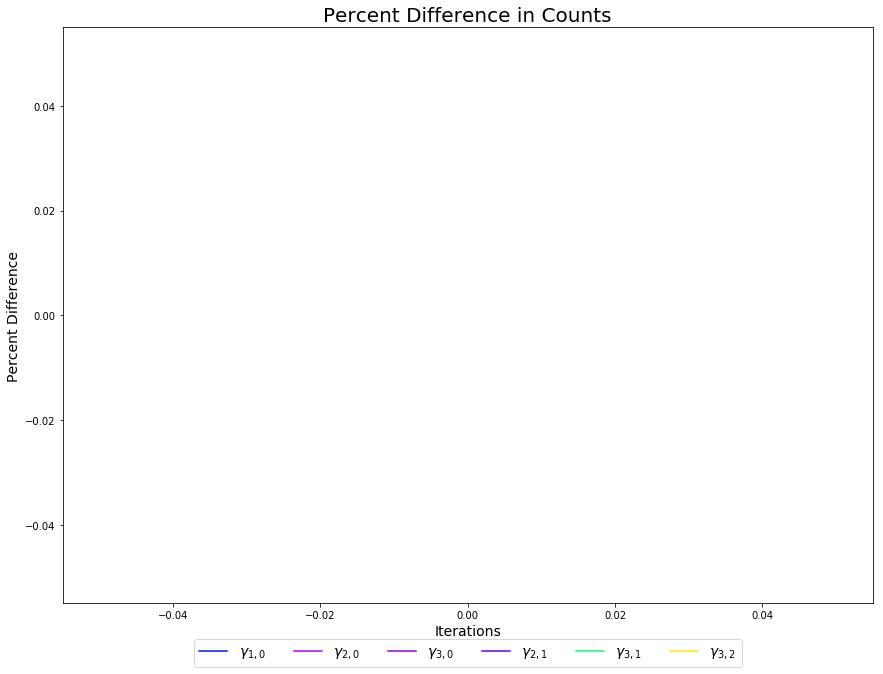

In [53]:
'''Plot Xg/X, XDiff, Sg/S or SDiff:'''
#      Set up empty arrays for each desired matrix element to plot evolution of Sg:
# Xg=findX(w, Sm, ep, bebug=False, show=False)
Xg=x
Sm=PeaktoSource(PeakData, Efficiencies, debug=False, show=False)

Sratio = np.zeros((w,w))
Xratio = np.zeros((w,w))
Fratio = np.zeros((0,w))

P = 50
delta = 0.01

Z = np.zeros((w,w,P))

for l in range(P):        
    Fg=findF(Xg, bebug=False, show=False)
    Sg=FullSum(x, Fg, Energies, et, ep, Q, alpha, debug=False, show=False)
    Sdiff=Sg-Sm
    Xdiff=Xg-x
    Fdiff=Fg-F
    for i in range(len(ep[0])):
        for j in range(len(ep[0])):
# Define percent differences for photopeak energy counts:
            if np.not_equal(Sm[j,i],0)==True:
                Sratio[j,i]=Sdiff[j,i]/Sm[j,i]
            elif np.not_equal(Sm[j,i],0)==False:
                Sratio[j,i]=0
# Define percent differences for branching ratios:       
            if np.not_equal(x[j,i],0)==True:
                Xratio[j,i]=Xdiff[j,i]/x[j,i]
            elif np.not_equal(x[j,i],0)==False:
                Xratio[j,i]=0
# Define percent differences for feeding fractions:   
#         if np.not_equal(F[0,i],0)==True:
#             Fratio[0,i]=Fdiff[0,i]/F[0,i]
#         elif np.not_equal(F[0,i],0)==False:
#             Fratio[0,i]=0
            
# Determine variable to plot:
        Z[:,:,l]=Xratio
    
    for i in range(len(Xg[0])):
        for j in range(len(Xg[0])):
# Adjust guesses based on ratio of counts:
            if (np.absolute(Sdiff[j,i])>delta):
                Xg[j,i]=Xg[j,i]-Xg[j,i]*Sratio[j,i]
                
# Generate random colors:
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
def get_cmap(n, name='hsv'):
    return plt.cm.get_cmap(name, n)
cmap = get_cmap(1000)

fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0, right=2, top=2)

plt.title('Percent Difference in Counts', fontsize=20)
ax.set_xlabel('Iterations', fontsize=14)
ax.set_ylabel('Percent Difference', fontsize=14, rotation=90)

# print("Final Guess", '\n', Xg)
# print("Actual Branching Ratios", '\n', x)
print("Final Difference", '\n', Xratio)
print("Feeding Fraction Difference",'\n', Fdiff)

labels = np.zeros((w,w))
LABELS = labels.astype(str)
for i in range(0,len(ep[0])):
        for j in range(0,len(ep[0])):
#             if j==3 and i==0:
#                 print(Xratio[j,i])
            if j>i:
                LABELS[j,i] = r'$\gamma_{'+str(j)+','+str(i)+'}$'
                plt.plot(Z[j,i,50:], c=cmap(np.random.randint(0,1000)), label=str(LABELS[j,i]))

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fontsize=14, ncol=10)
# plt.legend(fontsize=14)